In [19]:
import tensorflow as tf
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [21]:
print(x_train.shape)
print(x_val.shape)
print(y_train[:10])
print(y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


Пример кусочка картинки (пиксели со значениями от 0 до 255) : 


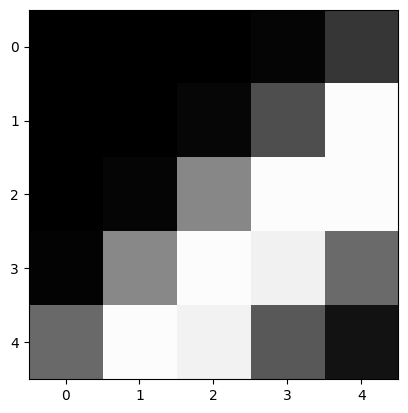

Пример картинки: 


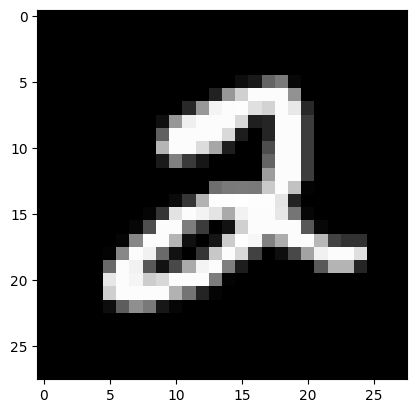

y_train [shape &s] 10 примеров: 
 (60000,) [5 0 4 1 9 2 1 3 1 4]


In [22]:
# нарисуем картинку
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:,:, np. newaxis], (1, 1, 3))

print ("Пример кусочка картинки (пиксели со значениями от 0 до 255) : ")

plt.imshow(x_train_image[15:20, 5:10], cmap="Greys" )
plt.show()

print( "Пример картинки: ")
plt.imshow(x_train_image, cmap="Greys")
plt. show( )
print("y_train [shape &s] 10 примеров: \n" , (str(y_train.shape)), y_train[:10])

Пример кусочка картинки (пиксели со значениями от 0 до 255):


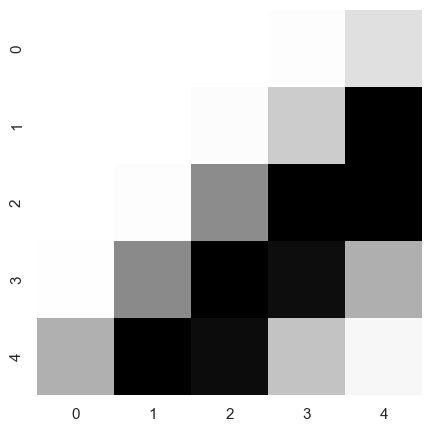

Пример картинки:


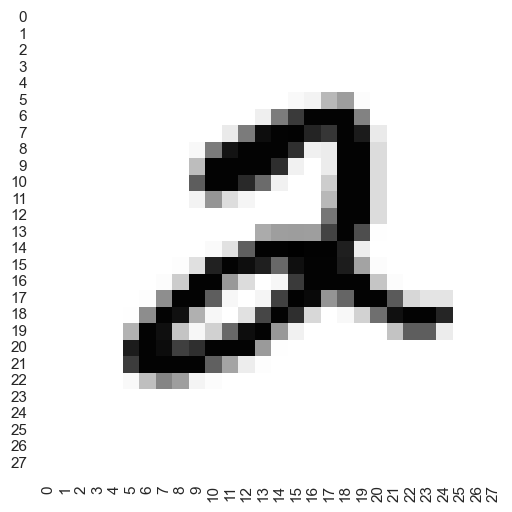

y_train [shape &s] 10 примеров: 
 (60000,) [5 0 4 1 9 2 1 3 1 4]


In [23]:
image = x_train[5]

# Настройка стиля Seaborn
sns.set(style="whitegrid")

# Показ кусочка картинки с помощью Seaborn
print("Пример кусочка картинки (пиксели со значениями от 0 до 255):")
plt.figure(figsize=(5, 5))
sns.heatmap(image[15:20, 5:10], cmap="Greys", cbar=False, square=True)
plt.show()

# Показ полной картинки с помощью Seaborn
print("Пример картинки:")
plt.figure(figsize=(6, 6))
sns.heatmap(image, cmap="Greys", cbar=False, square=True)
plt.show()

# Вывод первых 10 значений y_train
print("y_train [shape &s] 10 примеров: \n", str(y_train.shape), y_train[:10])

In [24]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train_flat.shape)

x_val__flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val__flat.shape)

(60000, 784)
(10000, 784)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
x_train_flat = scaler.fit_transform(x_train_flat)
x_val_flat = scaler.transform(x_val__flat)

In [26]:
x_train_flat[0,::20]

array([ 0.        ,  0.        , -0.03059266, -0.00852241, -0.01408835,
       -0.2625969 , -0.16124756,  0.        ,  1.71565971,  0.74933951,
       -0.11300485, -0.19700703,  1.12192712,  0.27021375, -0.00577281,
       -0.70132425,  1.64634567, -0.1273685 , -0.15382451, -0.19833719,
       -0.70732309, -0.00477028, -0.60978718, -0.9194134 , -0.17786005,
       -0.16833376,  0.65022085, -0.63188648,  0.        , -0.48806277,
        1.17394853, -0.14774138, -0.07003976, -0.61257571,  3.52099754,
        0.        , -0.09396514, -0.1826269 , -0.00579016,  0.        ])

In [28]:
from sklearn.linear_model import LogisticRegression

# Инициализация модели с правильным solver
clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")

# Обучение модели
clf.fit(x_train_flat, y_train)


/Users/apple/python/SkillFactory/Ml_learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/python/SkillFactory/Ml_learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, clf.predict(x_val_flat))

0.9246

In [32]:
clf.predict(x_val_flat)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Используемый в видео notebook: mnist_intro.ipynb

Начинаем с импорта следующих библиотек:

numpy — для матричных операций;
sklearn — для моделей машинного обучения;
matplotlib — для графиков;
tensorflow — для загрузки dataset MNIST.
Как работает линейная модель?

Например, есть модель логистической регрессии: она взвешивает коэффициентами все наши признаки и прогоняет через логистическую функцию. Такую модель можно быстро обучать с помощью градиентного спуска, который чуть–чуть меняет параметры этой модели на каждой интеграции, тем самым улучшая качество. Довольно быстро эта модель находит линию, которая разделяет два класса в нашем примере. 

Чтобы обучить нашу модель, нужно вспомнить, что линейной регрессии на вход нужен вектор признаков. Сейчас у нас двумерная картинка 28 × 28. Делаем просто: вытягиваем картинку построчно в вектор с помощью функции reshape. 

Прежде чем обучать линейную модуль, нужно вспомнить, что данные лучше отцентрировать и отнормировать с помощью StandartScaler.

После этого мы можем обучить линейную модель с помощью градиентных методов оптимизации.